In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression (Jan, Tim)

### 1. Import data and merge the weather data with the bicycle dataset for both cities

In [2]:
marburg = pd.read_pickle("../0_data/marburg_clean.pkl")
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')
marburg_weather = pd.read_pickle("../0_data/weather/marburg_weather.pkl")
duisburg_weather = pd.read_pickle("../0_data/weather/duisburg_weather.pkl")

In [3]:
marburg_weather["h"]= marburg_weather.index
marburg["h"]=marburg.index.floor(freq='h')
marburgWeather = pd.merge(marburg, marburg_weather, how='left', left_on='h', right_on='h')

duisburg_weather["h"]= duisburg_weather.index
duisburg["h"]=duisburg.index.floor(freq='h')
duisburgWeather = pd.merge(duisburg, duisburg_weather, how='left', left_on='h', right_on='h')

We now have the temperature data available for every single ride.

### 2. Define independent and dependent variables

Because we want to see how the temperature affects the bicycle demand, we want to define the demand (the number of bicycles rented during each hour) as our dependent variable (y) and the temperature for each hour as our independent variable (x).

Let us start with the Marburg data:

In [30]:
ym = marburgWeather.resample('H', on="h").count()["day"].values
xm = marburgWeather.resample('H', on="h").max()['temperature'].values.reshape(-1,1)

# There's a few NaN values in our xm variable, so we fill these in with the average temperature (the mean value that we
# got from the .describe() function below).
# marburgWeather["temperature"].describe()
xm = np.nan_to_num(xm, nan = 14.158637)

In [6]:
# Function to check for NaN values in an array, leave this for backup :)
#xm_sum = np.sum(xm)
#xm_nullcheck = np.isnan(xm_sum)
#xm_nullcheck

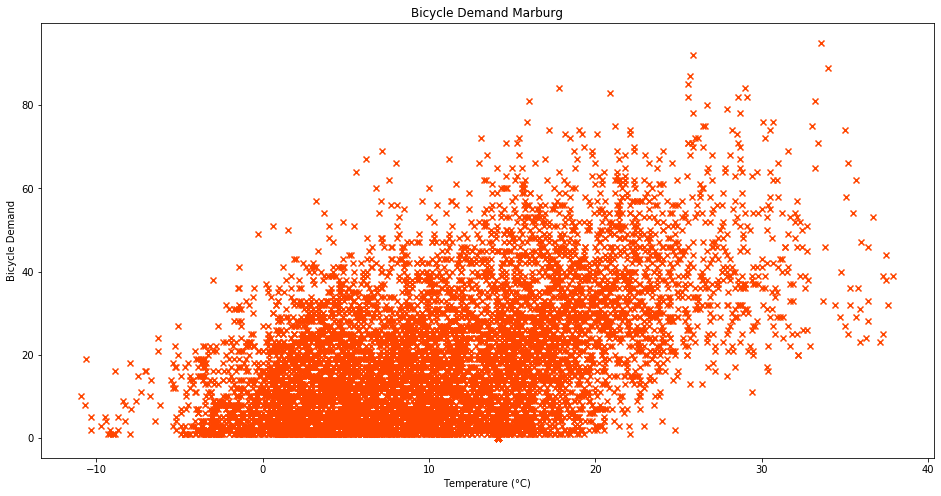

In [19]:
plt.figure(figsize = (16,8))
plt.scatter (xm, ym, marker = 'x', color = 'orangered')
plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Demand")
plt.title("Bicycle Demand Marburg")
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

### 3. Train / Test split

We split the data into a training and testing set, to better evaluate the model.

In [5]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=0)

### 3. Initialize linear model with scikit-learn

In [6]:
linear_model_mar = LinearRegression()

### 4. Fit the model

We train our linear modell with the training data.

In [7]:
linear_model_mar.fit(xm_train,ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 5. Predict training data

Here we make predicitions with the .predict() function on our testing set.

In [8]:
y_pred_m = linear_model_mar.predict(xm_test)

### 6. Define y true

In [9]:
y_true_m = ym_test

### 7. Plot the linear model

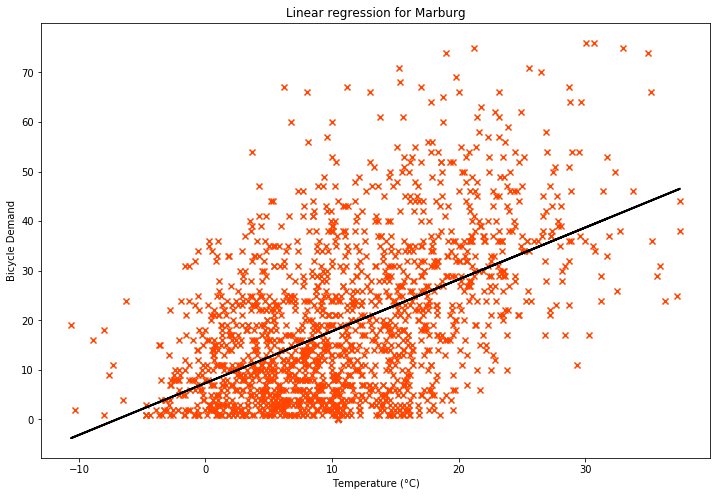

In [10]:
plt.figure(figsize = (16,8))

plt.scatter(xm_test, ym_test, marker="x", color = 'orangered')
plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Demand")
plt.title("Linear regression for Marburg")

plt.plot(xm_test, y_pred_m, color = 'black', linewidth = 2, label='hier kommt noch ein label hin')

xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.xlim(xlim)
plt.ylim(ylim)
#plt.legend()
plt.show()

### 8. Present test metrics

Here we are evaluating our model with the Mean Absolute Error, the Root Mean Squared Error and the R^2 score.

In [11]:
print("Mean Absolute Error Marburg:",mean_absolute_error(y_true_m, y_pred_m),"Bicycles")
print("Root Mean Squared Error Marburg:",mean_squared_error(y_true_m, y_pred_m)**0.5,"Bicycles")
print("Coefficient of determination Marburg:",r2_score(y_true_m, y_pred_m))

Mean Absolute Error Marburg: 10.81111649215055 Bicycles
Root Mean Squared Error Marburg: 13.622387446003072 Bicycles
Coefficient of determination Marburg: 0.25051982715386956


As you can see, the error metrics for our linear model are relatively bad, with a high MAE and RMSE and a low R^2 Score (the R^2 Score lies between 0 and 1, with a higher score signifying a better model).

### Linear regression for duisburg

Let us quickly repeat this process for the Duisburg dataset.

In [20]:
yd = duisburgWeather.resample('H', on="h").count()["day"].values
# day of year
xd = duisburgWeather.resample('H', on="h").max()['temperature'].values.reshape(-1,1)
xd = np.nan_to_num(xm, nan = 10.511236338797794)

xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size=0.2, random_state=0)

linear_model_dui = LinearRegression()

linear_model_dui.fit(xd_train,yd_train)

y_pred_d = linear_model_dui.predict(xd_test)

y_true_d = yd_test

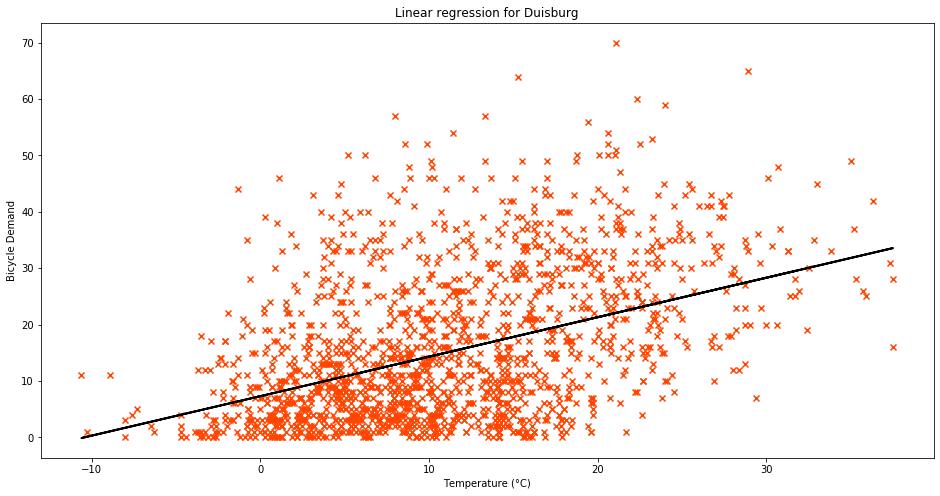

In [21]:
plt.figure(figsize = (16,8))

plt.scatter(xd_test, yd_test, marker="x", color = 'orangered')
plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Demand")
plt.title("Linear regression for Duisburg")

plt.plot(xd_test, y_pred_d, color = 'black', linewidth = 2, label='hier kommt noch ein label hin')

xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.xlim(xlim)
plt.ylim(ylim)
#plt.legend()
plt.show()

In [22]:
print("Mean Absolute Error Duisburg:",mean_absolute_error(y_true_d, y_pred_d),"Bicycles")
print("Root Mean Squared Error Duisburg:",mean_squared_error(y_true_d, y_pred_d)**0.5,"Bicycles")
print("Coefficient of determination Duisburg:",r2_score(y_true_d, y_pred_d))

Mean Absolute Error Duisburg: 9.42246518841469 Bicycles
Root Mean Squared Error Duisburg: 11.866419347313633 Bicycles
Coefficient of determination Duisburg: 0.17395487458271552


## Multiple linear regression

Here we are adding another feature to our linear regression to see if it iproves the performance of our model. We are starting with the Marburg data again.

We are adding another column "IsWeekday" to our data, with the goal of predicting the demand for weekdays and weekends seperately.

In [23]:
def weekday_check (dt):
    day_count = dt.weekday()
    if day_count <=4:
        return 1
    else:
        return 0

marburgWeather["IsWeekday"] = marburgWeather["day"].apply(weekday_check)
marburgWeather.head(5)

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,h,temperature,precipitation,IsWeekday
0,2019-07-04,13:29:00,11070,marburg,"(50.8081, 8.7754)","(50.811, 8.7742)",3,13,41,2019-07-04 13:00:00,23.8,0.0,1
1,2019-07-06,16:53:00,11070,marburg,"(50.7987, 8.753)","(50.8058, 8.7828)",5,16,19,2019-07-06 16:00:00,28.1,0.0,0
2,2019-07-06,17:18:00,11070,marburg,"(50.8058, 8.7828)","(50.8229, 8.7747)",5,17,61,2019-07-06 17:00:00,27.7,0.0,0
3,2019-07-06,20:11:00,11070,marburg,"(50.82, 8.7737)","(50.7856, 8.7794)",5,20,30,2019-07-06 20:00:00,21.0,0.0,0
4,2019-07-07,08:47:00,11070,marburg,"(50.7856, 8.7794)","(50.7952, 8.7633)",6,8,12,2019-07-07 08:00:00,16.4,0.0,0


Here we are creating a new dataframe with all the features we need for our multiple linear regression (Temperature, Demand and IsWeekday).

In [34]:
MulRegMar = pd.DataFrame()
MulRegMar["temperature"] = marburgWeather.resample('H', on="h").max()['temperature'].values#.reshape(-1,1)
MulRegMar["IsWeekday"] = marburgWeather.resample('H', on="h").max()["IsWeekday"].values
MulRegMar["Demand"] = marburgWeather.resample('H', on="h").count()["day"].values
MulRegMar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  8345 non-null   float64
 1   IsWeekday    8345 non-null   float64
 2   Demand       8784 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 206.0 KB


As you can see, we still have a few NaN values for the temperature and IsWeekday columns in our dataframe. We fill those values with the average temperature and assume that every mising IsWeekday value is from a weekday (because there are more weekdays than days on the weekend).

In [37]:
# We get the average temperature with the .describe() function below.
# marburgWeather["temperature"].describe()
MulRegMar["temperature"] = MulRegMar["temperature"].fillna(14.158637)
MulRegMar["IsWeekday"] = MulRegMar["IsWeekday"].fillna(1)
MulRegMar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  8784 non-null   float64
 1   IsWeekday    8784 non-null   float64
 2   Demand       8784 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 206.0 KB


Next, we define our dependent (ym2, "Demand") and independent (Xm2, "Temperature" and "IsWeekday") vriables.
Then we split the data into training and testing sets, fit the model with the training data and predict our values with the testing set.

In [38]:
Xm2 = MulRegMar[["temperature", "IsWeekday"]]
ym2 = MulRegMar[["Demand", "IsWeekday"]]
xm2_train, xm2_test, ym2_train, ym2_test = train_test_split(Xm2, ym2, test_size=0.2, random_state=0)
lin_mod_mul_m = LinearRegression()
lin_mod_mul_m.fit(xm2_train, ym2_train["Demand"])
y_pred_m2 = lin_mod_mul_m.predict(xm2_test)
y_true_m2 = ym2_test["Demand"]
print(lin_mod_mul_m.coef_, lin_mod_mul_m.intercept_)

[0.98101358 4.87181702] 4.332815329746966


Then we split the data into weekend and weekday data and plot them seperately.

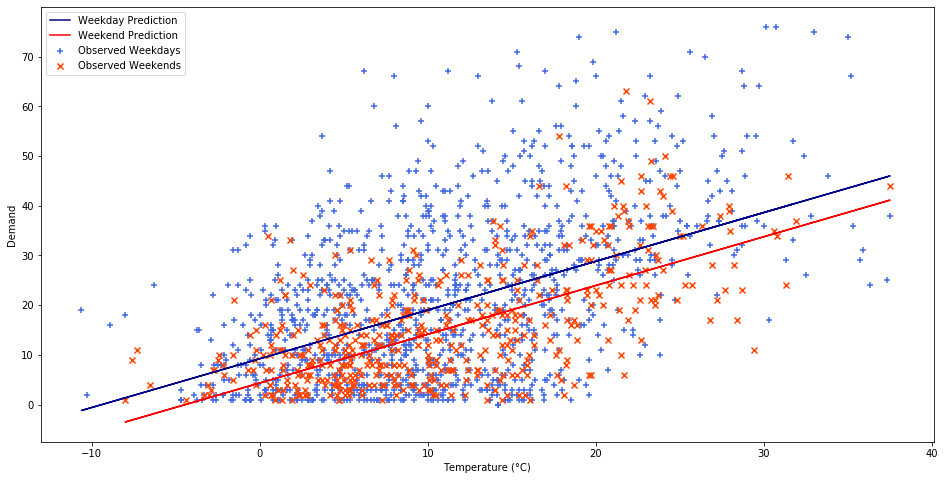

In [64]:
Xm2_weekday = xm2_test[xm2_test["IsWeekday"]==1]
Xm2_weekend = xm2_test[xm2_test["IsWeekday"]==0]
ym2_weekday = ym2_test[ym2_test["IsWeekday"]==1]
ym2_weekend = ym2_test[ym2_test["IsWeekday"]==0]
ym2_pred_weekday = lin_mod_mul_m.predict(Xm2_weekday)
ym2_pred_weekend = lin_mod_mul_m.predict(Xm2_weekend)

plt.figure(figsize = (16,8))

plt.scatter(Xm2_weekday["temperature"], ym2_weekday["Demand"],
            #MulRegMar[MulRegMar["IsWeekday"]==1]["Demand"], 
            marker="+", color = 'royalblue', label="Observed Weekdays")

plt.scatter(Xm2_weekend["temperature"], ym2_weekend["Demand"],
            #MulRegMar[MulRegMar["IsWeekday"]==0]["Demand"], 
            marker="x", color = 'orangered', label="Observed Weekends")

plt.plot(Xm2_weekday["temperature"], 
         ym2_pred_weekday, color = 'darkblue',
         label="Weekday Prediction")
plt.plot(Xm2_weekend["temperature"], 
         ym2_pred_weekend, color = 'red',
         label="Weekend Prediction")

plt.xlabel("Temperature (°C)")
plt.ylabel("Demand")

plt.legend()
plt.show()

Test metrics for one-dimensional vs. two-dimensional linear regression for Marburg:

In [19]:
#X_2md = MulRegMar[["temperature", "IsWeekday"]]
#y_pred_m2 = lin_mod_mul_m.predict(xm2_test)
print("MAE 1D Marburg:",mean_absolute_error(y_true_m, y_pred_m),"Bicycles")
print("MAE 2D Marburg:",mean_absolute_error(y_true_m2, y_pred_m2),"Bicycles")


print("RMSE 1D Marburg:",mean_squared_error(y_true_m, y_pred_m)**0.5,"Bicycles")
print("RMSE 2D Marburg:",mean_squared_error(y_true_m2, y_pred_m2)**0.5,"Bicycles")

print("R^2 1D Marburg:",r2_score(y_true_m, y_pred_m))
print("R^2 2D Marburg:",r2_score(y_true_m2, y_pred_m2))

MAE 1D Marburg: 10.81111649215055 Bicycles
MAE 2D Marburg: 10.70463924314468 Bicycles
RMSE 1D Marburg: 13.622387446003072 Bicycles
RMSE 2D Marburg: 13.490443469923742 Bicycles
R^2 1D Marburg: 0.25051982715386956
R^2 2D Marburg: 0.26496817286618013


### Multiple linear regression for Duisburg

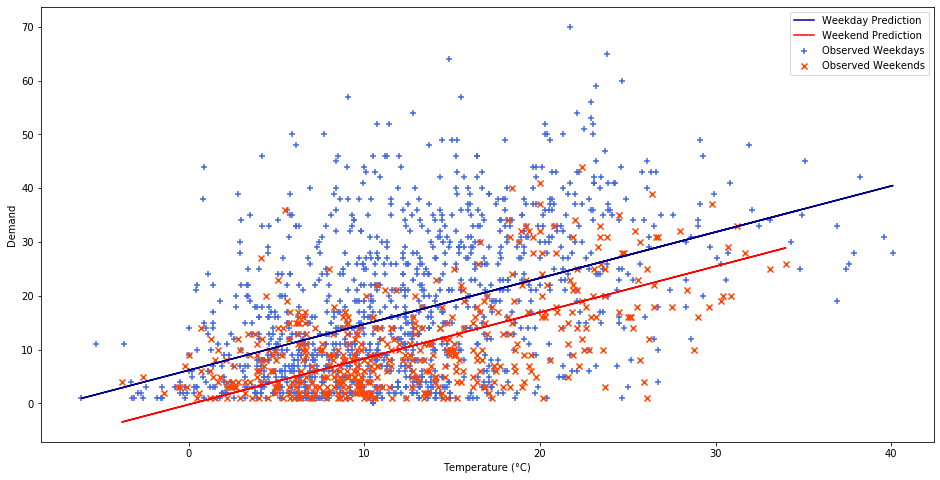

In [65]:
duisburgWeather["IsWeekday"] = duisburgWeather["day"].apply(weekday_check)
MulRegDui = pd.DataFrame()
MulRegDui["temperature"] = duisburgWeather.resample('H', on="h").max()['temperature'].values#.reshape(-1,1)
MulRegDui["temperature"] = MulRegDui["temperature"].fillna(10.511236338797794) #HIER NOCH AVG TEMP FÜR DUISBURG HIN!!!!!
MulRegDui["IsWeekday"] = duisburgWeather.resample('H', on="h").max()["IsWeekday"].values
MulRegDui["IsWeekday"] = MulRegDui["IsWeekday"].fillna(1)
MulRegDui["Demand"] = duisburgWeather.resample('H', on="h").count()["day"].values
Xd2 = MulRegDui[["temperature", "IsWeekday"]]
yd2 = MulRegDui[["Demand", "IsWeekday"]]
xd2_train, xd2_test, yd2_train, yd2_test = train_test_split(Xd2, yd2, test_size=0.2, random_state=0)
lin_mod_mul_d = LinearRegression()
lin_mod_mul_d.fit(xd2_train, yd2_train["Demand"])
y_pred_d2 = lin_mod_mul_d.predict(xd2_test)
y_true_d2 = yd2_test["Demand"]
Xd2_weekday = xd2_test[xd2_test["IsWeekday"]==1]
Xd2_weekend = xd2_test[xd2_test["IsWeekday"]==0]
yd2_weekday = yd2_test[yd2_test["IsWeekday"]==1]
yd2_weekend = yd2_test[yd2_test["IsWeekday"]==0]
yd2_pred_weekday = lin_mod_mul_d.predict(Xd2_weekday)
yd2_pred_weekend = lin_mod_mul_d.predict(Xd2_weekend)

plt.figure(figsize = (16,8))

plt.scatter(Xd2_weekday["temperature"], yd2_weekday["Demand"],
            #MulRegDui[MulRegDui["IsWeekday"]==1]["Demand"], 
            marker="+", color ="royalblue", label="Observed Weekdays")

plt.scatter(Xd2_weekend["temperature"], yd2_weekend["Demand"], 
            #MulRegDui[MulRegDui["IsWeekday"]==0]["Demand"], 
            marker="x", color = 'orangered', label="Observed Weekends")

plt.plot(Xd2_weekday["temperature"], 
         yd2_pred_weekday, color = 'darkblue',
         label="Weekday Prediction")
plt.plot(Xd2_weekend["temperature"], 
         yd2_pred_weekend, color = 'red',
         label="Weekend Prediction")

plt.xlabel("Temperature (°C)")
plt.ylabel("Demand")

plt.legend()
plt.show()

Test metrics for one-dimensional vs. two-dimensional linear regression for Duisburg:

In [67]:
#y_true_d2 = MulRegDui["Demand"]
#X_2dd = MulRegDui[["temperature", "IsWeekday"]]
#y_pred_d2 = lin_mod_mul_d.predict(X_2dd)
print("MAE 1D Duisburg:",mean_absolute_error(y_true_d, y_pred_d),"Bicycles")
print("MAE 2D Duisburg:",mean_absolute_error(y_true_d2, y_pred_d2),"Bicycles")


print("RMSE 1D Duisburg:",mean_squared_error(y_true_d, y_pred_d)**0.5,"Bicycles")
print("RMSE 2D Duisburg:",mean_squared_error(y_true_d2, y_pred_d2)**0.5,"Bicycles")

print("R^2 1D Duisburg:",r2_score(y_true_d, y_pred_d))
print("R^2 2D Duisburg:",r2_score(y_true_d2, y_pred_d2))

MAE 1D Duisburg: 9.42246518841469 Bicycles
MAE 2D Duisburg: 8.936115931921169 Bicycles
RMSE 1D Duisburg: 11.866419347313633 Bicycles
RMSE 2D Duisburg: 11.329152534362557 Bicycles
R^2 1D Duisburg: 0.17395487458271552
R^2 2D Duisburg: 0.24706196309869222
